In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [3]:


# Load the dataset
file_path = '/content/drive/MyDrive/LungProject/weak_labels_lung_nodule_features.csv'
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)  # Show all columns

display(df.head())

display(df.describe())

df.info()


,patient_id,nodule_id,malignancy,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_

,malignancy,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.0,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,7.920000e+02,792.000000,792.000000,792.000000,7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Columns: 132 entries, patient_id to original_ngtdm_Strength
dtypes: float64(110), int64(3), object(19)
memory usage: 816.9+ KB


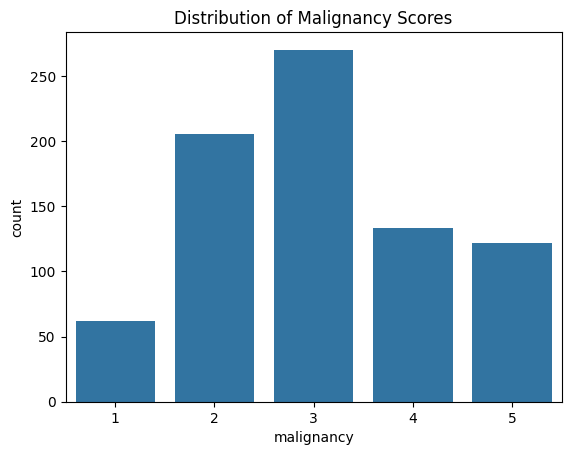

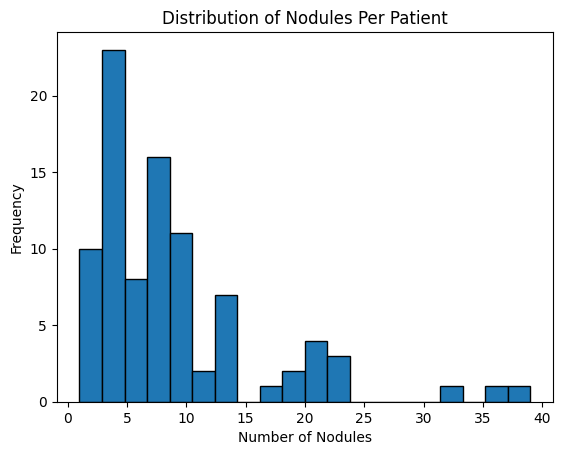

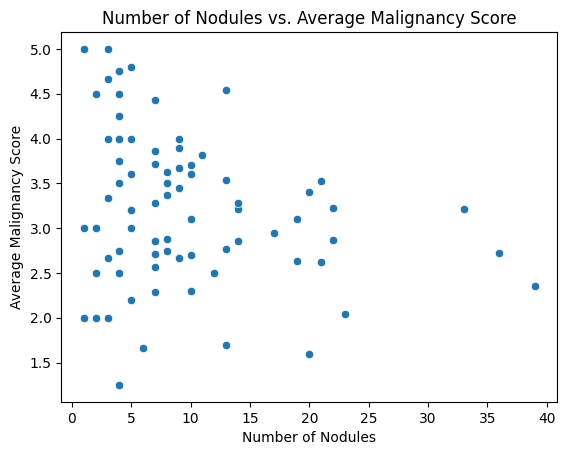

In [4]:
# Visualizing target variable distribution
sns.countplot(x='malignancy', data=df)
plt.title('Distribution of Malignancy Scores')
plt.show()

# Average number of nodules per patient
nodule_counts = df.groupby('patient_id').size()
plt.hist(nodule_counts, bins=20, edgecolor='k')
plt.title('Distribution of Nodules Per Patient')
plt.xlabel('Number of Nodules')
plt.ylabel('Frequency')
plt.show()

# Relationship between number of nodules and average malignancy
nodule_malignancy = df.groupby('patient_id').agg({'nodule_id': 'count', 'malignancy': 'mean'})
sns.scatterplot(x=nodule_malignancy['nodule_id'], y=nodule_malignancy['malignancy'])
plt.title('Number of Nodules vs. Average Malignancy Score')
plt.xlabel('Number of Nodules')
plt.ylabel('Average Malignancy Score')
plt.show()

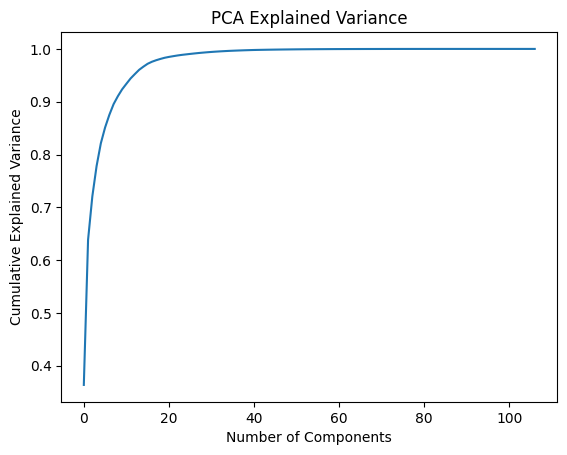

In [5]:

# Drop irrelevant columns
cols_to_drop = ['patient_id', 'nodule_id'] + [col for col in df.columns if col.startswith('diagnostics')]
df.drop(columns=cols_to_drop, inplace=True)


# Separate features and target
X = df.drop(columns=['malignancy'])
y = df['malignancy']

# Convert malignancy to ordinal categorical variable
# ordinal_encoder = OrdinalEncoder(categories=[[1, 2, 3, 4, 5]])
# y = ordinal_encoder.fit_transform(y).ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Analyze explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.95) + 1

# Plot explained variance
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()





## Modelling Results

In [6]:

# Reduce dimensionality using optimal components
pca = PCA(n_components=optimal_components)
X_train_pca_optimal = pca.fit_transform(X_train_scaled)
X_test_pca_optimal = pca.transform(X_test_scaled)

# Train logistic regression with PCA features
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca_optimal, y_train)
y_pred_lr_pca = log_reg_pca.predict(X_test_pca_optimal)
print("Logistic Regression (PCA):")
print(classification_report(y_test, y_pred_lr_pca))

# Train random forest with PCA features
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca_optimal, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca_optimal)
print("Random Forest (PCA):")
print(classification_report(y_test, y_pred_rf_pca))

# Train logistic regression with original features
log_reg_orig = LogisticRegression(max_iter=1000)
log_reg_orig.fit(X_train_scaled, y_train)
y_pred_lr_orig = log_reg_orig.predict(X_test_scaled)
print("Logistic Regression (Original Features):")
print(classification_report(y_test, y_pred_lr_orig))

# Train random forest with original features
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train_scaled, y_train)
y_pred_rf_orig = rf_orig.predict(X_test_scaled)
print("Random Forest (Original Features):")
print(classification_report(y_test, y_pred_rf_orig))


Logistic Regression (PCA):
              precision    recall  f1-score   support

           1       0.50      0.62      0.56         8
           2       0.35      0.29      0.32        38
           3       0.51      0.57      0.54        63
           4       0.36      0.20      0.26        25
           5       0.58      0.76      0.66        25

    accuracy                           0.48       159
   macro avg       0.46      0.49      0.46       159
weighted avg       0.46      0.48      0.46       159

Random Forest (PCA):
              precision    recall  f1-score   support

           1       0.43      0.38      0.40         8
           2       0.30      0.34      0.32        38
           3       0.56      0.44      0.50        63
           4       0.41      0.44      0.42        25
           5       0.53      0.68      0.60        25

    accuracy                           0.45       159
   macro avg       0.45      0.46      0.45       159
weighted avg       0.46      

## Tuning Random Forest model

In [7]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import classification_report, accuracy_score

# # Initialize Random Forest Classifier
# rf_tuned_model = RandomForestClassifier(random_state=42)

# # Define hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # Number of trees
#     'max_depth': [None, 10, 20, 30],       # Depth of trees
#     'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],         # Minimum samples required at leaf node
#     'max_features': ['sqrt', 'log2'],      # Number of features to consider for splitting
#     'bootstrap': [True, False]             # Whether bootstrap samples are used
# }

# # Perform randomized search to find optimal hyperparameters
# random_search = RandomizedSearchCV(
#     rf_tuned_model, param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
# )

# # Fit the model with training data
# random_search.fit(X_train_pca_optimal, y_train)

# # Get the best parameters and best model
# best_rf_model = random_search.best_estimator_
# print("Best Parameters:", random_search.best_params_)

# # Make predictions on the test set
# y_pred_rf = best_rf_model.predict(X_test_pca_optimal)

# # Evaluate model performance
# print("Random Forest with PCA (Optimized):")
# print(classification_report(y_test, y_pred_rf))
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))


KeyboardInterrupt: 

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import classification_report, accuracy_score

# # Initialize Random Forest Classifier
# rf_tuned_model = RandomForestClassifier(random_state=42)

# # Define hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # Number of trees
#     'max_depth': [None, 10, 20, 30],       # Depth of trees
#     'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],         # Minimum samples required at leaf node
#     'max_features': ['sqrt', 'log2'],      # Number of features to consider for splitting
#     'bootstrap': [True, False]             # Whether bootstrap samples are used
# }

# # Perform randomized search to find optimal hyperparameters
# random_search = RandomizedSearchCV(
#     rf_tuned_model, param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
# )

# # Fit the model with training data
# random_search.fit(X_train_scaled, y_train)

# # Get the best parameters and best model
# best_rf_model = random_search.best_estimator_
# print("Best Parameters:", random_search.best_params_)

# # Make predictions on the test set
# y_pred_rf = best_rf_model.predict(X_test_scaled)

# # Evaluate model performance
# print("Random Forest with Original Features (Optimized):")
# print(classification_report(y_test, y_pred_rf))
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))


## Creating binary classification problem

In [8]:

# Load the dataset
file_path = '/content/drive/MyDrive/LungProject/weak_labels_lung_nodule_features.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
cols_to_drop = ['patient_id', 'nodule_id'] + [col for col in df.columns if col.startswith('diagnostics')]
df.drop(columns=cols_to_drop, inplace=True)


# Create a binary classification for malignancy
df['malignancy_binary'] = df['malignancy'].map({1: 'Not Suspicious', 2: 'Not Suspicious', 4: 'Suspicious', 5: 'Suspicious'})

# Drop original malignancy and rows with malignancy 3
df = df[df['malignancy'] != 3]
df = df.drop('malignancy', axis=1)

# Separate features and target
X = df.drop(columns=['malignancy_binary'])
y = df['malignancy_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Analyze explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.95) + 1

# # Plot explained variance
# plt.plot(explained_variance)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA Explained Variance')
# plt.show()

In [10]:

# Reduce dimensionality using optimal components
pca = PCA(n_components=optimal_components)
X_train_pca_optimal = pca.fit_transform(X_train_scaled)
X_test_pca_optimal = pca.transform(X_test_scaled)

# Train logistic regression with PCA features
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca_optimal, y_train)
y_pred_lr_pca = log_reg_pca.predict(X_test_pca_optimal)
print("Logistic Regression (PCA):")
print(classification_report(y_test, y_pred_lr_pca))

# Train random forest with PCA features
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca_optimal, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca_optimal)
print("Random Forest (PCA):")
print(classification_report(y_test, y_pred_rf_pca))

# Train logistic regression with original features
log_reg_orig = LogisticRegression(max_iter=1000)
log_reg_orig.fit(X_train_scaled, y_train)
y_pred_lr_orig = log_reg_orig.predict(X_test_scaled)
print("Logistic Regression (Original Features):")
print(classification_report(y_test, y_pred_lr_orig))

# Train random forest with original features
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train_scaled, y_train)
y_pred_rf_orig = rf_orig.predict(X_test_scaled)
print("Random Forest (Original Features):")
print(classification_report(y_test, y_pred_rf_orig))

Logistic Regression (PCA):
                precision    recall  f1-score   support

Not Suspicious       0.84      0.83      0.83        58
    Suspicious       0.79      0.81      0.80        47

      accuracy                           0.82       105
     macro avg       0.82      0.82      0.82       105
  weighted avg       0.82      0.82      0.82       105

Random Forest (PCA):
                precision    recall  f1-score   support

Not Suspicious       0.84      0.83      0.83        58
    Suspicious       0.79      0.81      0.80        47

      accuracy                           0.82       105
     macro avg       0.82      0.82      0.82       105
  weighted avg       0.82      0.82      0.82       105

Logistic Regression (Original Features):
                precision    recall  f1-score   support

Not Suspicious       0.81      0.86      0.83        58
    Suspicious       0.81      0.74      0.78        47

      accuracy                           0.81       105
     ma

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest Classifier
rf_tuned_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],       # Depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at leaf node
    'max_features': ['sqrt', 'log2'],      # Number of features to consider for splitting
    'bootstrap': [True, False]             # Whether bootstrap samples are used
}

# Perform randomized search to find optimal hyperparameters
random_search = RandomizedSearchCV(
    rf_tuned_model, param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the model with training data
random_search.fit(X_train_pca_optimal, y_train)

# Get the best parameters and best model
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_pca_optimal)

# Evaluate model performance
print("Random Forest with PCA (Optimized):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Random Forest with PCA (Optimized):
                precision    recall  f1-score   support

Not Suspicious       0.86      0.83      0.84        58
    Suspicious       0.80      0.83      0.81        47

      accuracy                           0.83       105
     macro avg       0.83      0.83      0.83       105
  weighted avg       0.83      0.83      0.83       105

Accuracy: 0.8285714285714286


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest Classifier
rf_tuned_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],       # Depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at leaf node
    'max_features': ['sqrt', 'log2'],      # Number of features to consider for splitting
    'bootstrap': [True, False]             # Whether bootstrap samples are used
}

# Perform randomized search to find optimal hyperparameters
random_search = RandomizedSearchCV(
    rf_tuned_model, param_grid, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the model with training data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate model performance
print("Random Forest with PCA (Optimized):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Random Forest with PCA (Optimized):
                precision    recall  f1-score   support

Not Suspicious       0.81      0.81      0.81        58
    Suspicious       0.77      0.77      0.77        47

      accuracy                           0.79       105
     macro avg       0.79      0.79      0.79       105
  weighted avg       0.79      0.79      0.79       105

Accuracy: 0.7904761904761904
